## Introduction
Influenza A is the most common type of flu. H1N1 flu is a subtype of influenza A. H1N1 flu is caused by a virus that is different from the seasonal flu that occurs each fall and winter.<br>
With COVID-19 pandemic and upcoming influenza season in the Fall, Summit Medical Association asked me to analyze existing data on individuals who got H1N1 Flu vaccine and those who didn’t.  Summit Medical  wants to increase the number of people who get the H1N1 vaccine and set goals for vulnerable groups.<br> 
I will  provide you with facts, insights, which factors had a significant impact on people deciding to get vaccine  and recommendations to increase rates.<br>
I will run models to predict whether an individual based on features will get the H1N1 vaccine or not.  This provides insights into which factors influence a person’s decision to get vaccine.<br>
Data set consist of 36 features and 26,707 rows.  The features range from income level, age, gender, employment status to education levels. Each row in the dataset represents an individual who responded to the National 2009 H1N1 Flu Survey.<br>


In [1]:
import pandas as pd
import numpy as np
from matplotlib import  pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.model_selection import train_test_split

#pd.set_option('display.max_rows', 10)

#plt.style.available
#plt.style.use('fivethirtyeight')

In [2]:
data = pd.read_csv('h1n1_features.csv')

In [3]:
data.head()

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0              0           1.0             0.0                        0.0   
1              1           3.0             2.0                        0.0   
2              2           1.0             1.0                        0.0   
3              3           1.0             1.0                        0.0   
4              4           2.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0   
1                          0.0                      1.0   
2                          0.0                      0.0   
3                          1.0                      0.0   
4                          1.0                      0.0   

   behavioral_touch_face  ...             income_poverty  marital_status  \
0                    1.0  ...              Below Poverty     Not Married   
1                    1.0  ...              Below Poverty     Not Married   
2                    0.0  ...  <= $75,000, Above Poverty     Not Married   
3                    0.0  ...              Below Poverty     Not Married   
4                    1.0  ...  <= $75,000, Above Poverty         Married   

   rent_or_own   employment_status  hhs_geo_region                census_msa  \
0          Own  Not in Labor Force        oxchjgsf                   Non-MSA   
1         Rent            Employed        bhuqouqj  MSA, Not Principle  City   
2          Own            Employed        qufhixun  MSA, Not Principle  City   
3         Rent  Not in Labor Force        lrircsnp       MSA, Principle City   
4          Own            Employed        qufhixun  MSA, Not Principle  City   

   household_adults  household_children  employment_industry  \
0               0.0                 0.0                  NaN   
1               0.0                 0.0             pxcmvdjn   
2               2.0                 0.0             rucpziij   
3               0.0                 0.0                  NaN   
4               1.0                 0.0             wxleyezf   

   employment_occupation  
0                    NaN  
1               xgwztkwe  
2               xtkaffoo  
3                    NaN  
4               emcorrxb  

[5 rows x 36 columns]

In [4]:
data.shape

(26707, 36)

In [5]:
labels = pd.read_csv('h1n1_labels.csv')
labels.head()

respondent_id  h1n1_vaccine  seasonal_vaccine
0              0             0                 0
1              1             0                 1
2              2             0                 0
3              3             0                 1
4              4             0                 0

In [6]:
data_df = pd.concat([data, labels], axis=1)
data_df.drop('respondent_id',axis=1, inplace=True)

In [7]:
pd.set_option('display.max_columns', None)
data_df.head()

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0           1.0             0.0                        0.0   
1           3.0             2.0                        0.0   
2           1.0             1.0                        0.0   
3           1.0             1.0                        0.0   
4           2.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0   
1                          0.0                      1.0   
2                          0.0                      0.0   
3                          1.0                      0.0   
4                          1.0                      0.0   

   behavioral_touch_face  doctor_recc_h1n1  doctor_recc_seasonal  \
0                    1.0               0.0                   0.0   
1                    1.0               0.0                   0.0   
2                    0.0               NaN                   NaN   
3                    0.0               0.0                   1.0   
4                    1.0               0.0                   0.0   

   chronic_med_condition  child_under_6_months  health_worker  \
0                    0.0                   0.0            0.0   
1                    0.0                   0.0            0.0   
2                    1.0                   0.0            0.0   
3                    1.0                   0.0            0.0   
4                    0.0                   0.0            0.0   

   health_insurance  opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
0               1.0                          3.0                1.0   
1               1.0                          5.0                4.0   
2               NaN                          3.0                1.0   
3               NaN                          3.0                3.0   
4               NaN                          3.0                3.0   

   opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  \
0                          2.0                          2.0   
1                          4.0                          4.0   
2                          1.0                          4.0   
3                          5.0                          5.0   
4                          2.0                          3.0   

   opinion_seas_risk  opinion_seas_sick_from_vacc      age_group  \
0                1.0                          2.0  55 - 64 Years   
1                2.0                          4.0  35 - 44 Years   
2                1.0                          2.0  18 - 34 Years   
3                4.0                          1.0      65+ Years   
4                1.0                          4.0  45 - 54 Years   

          education   race     sex             income_poverty marital_status  \
0        < 12 Years  White  Female              Below Poverty    Not Married   
1          12 Years  White    Male              Below Poverty    Not Married   
2  College Graduate  White    Male  <= $75,000, Above Poverty    Not Married   
3          12 Years  White  Female              Below Poverty    Not Married   
4      Some College  White  Female  <= $75,000, Above Poverty        Married   

  rent_or_own   employment_status hhs_geo_region                census_msa  \
0         Own  Not in Labor Force       oxchjgsf                   Non-MSA   
1        Rent            Employed       bhuqouqj  MSA, Not Principle  City   
2         Own            Employed       qufhixun  MSA, Not Principle  City   
3        Rent  Not in Labor Force 

In [8]:
data_df.shape

(26707, 37)

In [9]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 37 columns):
h1n1_concern                   26615 non-null float64
h1n1_knowledge                 26591 non-null float64
behavioral_antiviral_meds      26636 non-null float64
behavioral_avoidance           26499 non-null float64
behavioral_face_mask           26688 non-null float64
behavioral_wash_hands          26665 non-null float64
behavioral_large_gatherings    26620 non-null float64
behavioral_outside_home        26625 non-null float64
behavioral_touch_face          26579 non-null float64
doctor_recc_h1n1               24547 non-null float64
doctor_recc_seasonal           24547 non-null float64
chronic_med_condition          25736 non-null float64
child_under_6_months           25887 non-null float64
health_worker                  25903 non-null float64
health_insurance               14433 non-null float64
opinion_h1n1_vacc_effective    26316 non-null float64
opinion_h1n1_risk          

In [10]:
data_df.dtypes.value_counts()

float64    23
object     12
int64       2
dtype: int64

## Exploratory Data Analysis 

### Missing Values

In [11]:
data_df.isna().sum()

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

In [12]:
def missing_values_table(df):
    """
    df: data set
    """
    #find, sum and sort missing values
    null_sum = data_df.isnull().sum()
    total = null_sum.sort_values(ascending=False)
    percent = (((null_sum / len(data_df))*100).round(2)).sort_values(ascending=False)

    # concatenate along the columns 
    df_Null = pd.concat([total, percent], axis=1, keys=['Number of NaN', 'Percent NaN'])
    
    mis_val_columns = df_Null[df_Null.iloc[:,1] != 0]
    #return mis_val_columns
    print ("The dataframe has " + str(data_df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_columns.shape[0]) +" columns that have missing values.")

    return df_Null

In [13]:
missing_values_table(data_df)

The dataframe has 37 columns.
There are 30 columns that have missing values.


Number of NaN  Percent NaN
employment_occupation                13470        50.44
employment_industry                  13330        49.91
health_insurance                     12274        45.96
income_poverty                        4423        16.56
doctor_recc_seasonal                  2160         8.09
doctor_recc_h1n1                      2160         8.09
rent_or_own                           2042         7.65
employment_status                     1463         5.48
marital_status                        1408         5.27
education                             1407         5.27
chronic_med_condition                  971         3.64
child_under_6_months                   820         3.07
health_worker                          804         3.01
opinion_seas_sick_from_vacc            537         2.01
opinion_seas_risk                      514         1.92
opinion_seas_vacc_effective            462         1.73
opinion_h1n1_sick_from_vacc            395         1.48
opinion_h1n1_vacc_effective            391         1.46
opinion_h1n1_risk                      388         1.45
household_adults                       249         0.93
household_children                     249         0.93
behavioral_avoidance                   208         0.78
behavioral_touch_face                  128         0.48
h1n1_knowledge                         116         0.43
h1n1_concern                            92         0.34
behavioral_large_gatherings             87         0.33
behavioral_outside_home                 82         0.31
behavioral_antiviral_meds               71         0.27
behavioral_wash_hands                   42         0.16
behavioral_face_mask                    19         0.07
h1n1_vaccine                             0         0.00
age_group                                0         0.00
race                                     0         0.00
sex                                      0         0.00
hhs_geo_region                           0         0.00
census_msa                               0         0.00
seasonal_vaccine                         0         0.00

#### employment_occupation

In [14]:
#employment_occupation
data_df['employment_occupation'].value_counts(dropna=False)

NaN         13470
xtkaffoo     1778
mxkfnird     1509
emcorrxb     1270
cmhcxjea     1247
xgwztkwe     1082
hfxkjkmi      766
qxajmpny      548
xqwwgdyp      485
kldqjyjy      469
uqqtjvyb      452
tfqavkke      388
ukymxvdu      372
vlluhbov      354
oijqvulv      344
ccgxvspp      341
bxpfxfdn      331
haliazsg      296
rcertsgn      276
xzmlyyjv      248
dlvbwzss      227
hodpvpew      208
dcjcmpih      148
pvmttkik       98
Name: employment_occupation, dtype: int64

In [15]:
data_df[['employment_occupation','employment_status','employment_industry']]

employment_occupation   employment_status employment_industry
0                       NaN  Not in Labor Force                 NaN
1                  xgwztkwe            Employed            pxcmvdjn
2                  xtkaffoo            Employed            rucpziij
3                       NaN  Not in Labor Force                 NaN
4                  emcorrxb            Employed            wxleyezf
...                     ...                 ...                 ...
26702                   NaN  Not in Labor Force                 NaN
26703              cmhcxjea            Employed            fcxhlnwr
26704                   NaN                 NaN                 NaN
26705              haliazsg            Employed            fcxhlnwr
26706                   NaN  Not in Labor Force                 NaN

[26707 rows x 3 columns]

In [16]:
#table[(table.column_name == some_value) | (table.column_name2 == some_value2)]
#df_employ_null = data_df[(data_df['employment_occupation'] == np.NaN) | (data_df['employment_status'] == 'Not in Labor Force')]
df_employ_null = data_df[data_df['employment_status'] == 'Not in Labor Force']
df_employ_null.head()

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0            1.0             0.0                        0.0   
3            1.0             1.0                        0.0   
9            2.0             1.0                        0.0   
12           1.0             1.0                        0.0   
14           3.0             1.0                        0.0   

    behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                    0.0                   0.0                    0.0   
3                    1.0                   0.0                    1.0   
9                    1.0                   0.0                    0.0   
12                   1.0                   0.0                    1.0   
14                   1.0                   0.0                    1.0   

    behavioral_large_gatherings  behavioral_outside_home  \
0                           0.0                      1.0   
3                           1.0                      0.0   
9                           1.0                      0.0   
12                          1.0                      0.0   
14                          0.0                      1.0   

    behavioral_touch_face  doctor_recc_h1n1  doctor_recc_seasonal  \
0                     1.0               0.0                   0.0   
3                     0.0               0.0                   1.0   
9                     1.0               0.0                   0.0   
12                    1.0               0.0                   1.0   
14                    1.0               0.0                   0.0   

    chronic_med_condition  child_under_6_months  health_worker  \
0                     0.0                   0.0            0.0   
3                     1.0                   0.0            0.0   
9                     1.0                   0.0            0.0   
12                    0.0                   0.0            0.0   
14                    0.0                   0.0            0.0   

    health_insurance  opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
0                1.0                          3.0                1.0   
3                NaN                          3.0                3.0   
9                1.0                          4.0                2.0   
12               1.0                          3.0                2.0   
14               1.0                          5.0                4.0   

    opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  \
0                           2.0                          2.0   
3                           5.0                          5.0   
9                           2.0                          4.0   
12                          1.0                          5.0   
14                          2.0                          4.0   

    opinion_seas_risk  opinion_seas_sick_from_vacc      age_group  \
0                 1.0                          2.0  55 - 64 Years   
3                 4.0                          1.0      65+ Years   
9                 2.0                          2.0  55 - 64 Years   
12                4.0                          1.0      65+ Years   
14                4.0                          2.0  55 - 64 Years   

           education   race     sex             income_poverty marital_status  \
0         < 12 Years  White  Female              Below Poverty    Not Married   
3           12 Years  White  Female              Below Poverty    Not Married   
9           12 Years  White    Male  <= $75,000, Above Poverty    Not Married   
12  College Graduate  White    Male  <= $75,000, Above Poverty        Married   
14          12 Years  White    Male  <= $75,000, Above Poverty        Married   

   rent_or_own   employment_status hhs_geo_region                census_msa  \
0          Own  Not in Labor Force       oxchjgsf                   Non-MSA   
3         Rent  Not in Labor Force       lrircsnp       MSA, Principle City   
9          Own  Not in Labor Force       qufhixun  MSA, 

In [17]:
#pd.set_option('display.max_rows', None)
#df_employ_null[['employment_occupation','employment_status','employment_industry','health_insurance']]

In [18]:
len(df_employ_null)

10231

In [19]:
data_df['employment_occupation'].value_counts(dropna=False)

NaN         13470
xtkaffoo     1778
mxkfnird     1509
emcorrxb     1270
cmhcxjea     1247
xgwztkwe     1082
hfxkjkmi      766
qxajmpny      548
xqwwgdyp      485
kldqjyjy      469
uqqtjvyb      452
tfqavkke      388
ukymxvdu      372
vlluhbov      354
oijqvulv      344
ccgxvspp      341
bxpfxfdn      331
haliazsg      296
rcertsgn      276
xzmlyyjv      248
dlvbwzss      227
hodpvpew      208
dcjcmpih      148
pvmttkik       98
Name: employment_occupation, dtype: int64

#### health insurance

In [20]:
#health insurance
#Most of NaNs are not in labor force so probabily don't have health insurance
data_df['health_insurance'].value_counts(dropna=False)

1.0    12697
NaN    12274
0.0     1736
Name: health_insurance, dtype: int64

In [21]:
data_df['health_insurance'].fillna(0, inplace=True)

In [22]:
#df_data['health_insurance'].isna().sum()
data_df['health_insurance'].value_counts(dropna=False)

0.0    14010
1.0    12697
Name: health_insurance, dtype: int64

#### employment_occupation

In [23]:
#health_insurance = done
#employment_occupation / NaN  = 'Not in Labor Force'
#employment_industry / NaN = 'Not in Labor Force'
#health_insurance / NaN = 0
data_df["employment_occupation"].fillna("Not in Labor Force", inplace = True) 
data_df["employment_industry"].fillna("Not in Labor Force", inplace = True) 

In [24]:
data_df[["employment_occupation","employment_industry","health_insurance"]].isna().sum()

employment_occupation    0
employment_industry      0
health_insurance         0
dtype: int64

In [25]:
data_df["employment_occupation"].value_counts()

Not in Labor Force    13470
xtkaffoo               1778
mxkfnird               1509
emcorrxb               1270
cmhcxjea               1247
xgwztkwe               1082
hfxkjkmi                766
qxajmpny                548
xqwwgdyp                485
kldqjyjy                469
uqqtjvyb                452
tfqavkke                388
ukymxvdu                372
vlluhbov                354
oijqvulv                344
ccgxvspp                341
bxpfxfdn                331
haliazsg                296
rcertsgn                276
xzmlyyjv                248
dlvbwzss                227
hodpvpew                208
dcjcmpih                148
pvmttkik                 98
Name: employment_occupation, dtype: int64

#### income poverty

In [26]:
#income poverty
data_df['income_poverty'].value_counts(dropna=False)

<= $75,000, Above Poverty    12777
> $75,000                     6810
NaN                           4423
Below Poverty                 2697
Name: income_poverty, dtype: int64

In [27]:
income_poverty_null = data_df[(data_df['income_poverty'] == np.NaN) | (data_df['employment_status'] == 'Not in Labor Force')]

In [28]:
income_poverty_null[['income_poverty','employment_status']].head(50)

income_poverty   employment_status
0                Below Poverty  Not in Labor Force
3                Below Poverty  Not in Labor Force
9    <= $75,000, Above Poverty  Not in Labor Force
12   <= $75,000, Above Poverty  Not in Labor Force
14   <= $75,000, Above Poverty  Not in Labor Force
16   <= $75,000, Above Poverty  Not in Labor Force
19   <= $75,000, Above Poverty  Not in Labor Force
20   <= $75,000, Above Poverty  Not in Labor Force
23               Below Poverty  Not in Labor Force
27   <= $75,000, Above Poverty  Not in Labor Force
28   <= $75,000, Above Poverty  Not in Labor Force
29   <= $75,000, Above Poverty  Not in Labor Force
31                         NaN  Not in Labor Force
33   <= $75,000, Above Poverty  Not in Labor Force
35   <= $75,000, Above Poverty  Not in Labor Force
38                         NaN  Not in Labor Force
43                   > $75,000  Not in Labor Force
46                   > $75,000  Not in Labor Force
49                   > $75,000  Not in Labor Force
66               Below Poverty  Not in Labor Force
68                         NaN  Not in Labor Force
69   <= $75,000, Above Poverty  Not in Labor Force
71               Below Poverty  Not in Labor Force
72   <= $75,000, Above Poverty  Not in Labor Force
73   <= $75,000, Above Poverty  Not in Labor Force
74               Below Poverty  Not in Labor Force
78                         NaN  Not in Labor Force
84                         NaN  Not in Labor Force
87   <= $75,000, Above Poverty  Not in Labor Force
88   <= $75,000, Above Poverty  Not in Labor Force
91                         NaN  Not in Labor Force
93   <= $75,000, Above Poverty  Not in Labor Force
96   <= $75,000, Above Poverty  Not in Labor Force
97                   > $75,000  Not in Labor Force
98               Below Poverty  Not in Labor Force
99               Below Poverty  Not in Labor Force
102                  > $75,000  Not in Labor Force
104                        NaN  Not in Labor Force
109              Below Poverty  Not in Labor Force
110  <= $75,000, Above Poverty  Not in Labor Force
115                        NaN  Not in Labor Force
120  <= $75,000, Above Poverty  Not in Labor Force
122              Below Poverty  Not in Labor Force
123                  > $75,000  Not in Labor Force
125  <= $75,000, Above Poverty  Not in Labor Force
127  <= $75,000, Above Poverty  Not in Labor Force
128  <= $75,000, Above Poverty  Not in Labor Force
133  <= $75,000, Above Poverty  Not in Labor Force
134  <= $75,000, Above Poverty  Not in Labor Force
135  <= $75,000, Above Poverty  Not in Labor Force

In [29]:
#df_data.iloc[df_data['income_poverty'] == np.NaN]
income_pov_nan = data_df[data_df['income_poverty'].isnull()]

In [30]:
income_pov_nan['income_poverty']

24       NaN
26       NaN
31       NaN
38       NaN
39       NaN
        ... 
26667    NaN
26672    NaN
26675    NaN
26696    NaN
26704    NaN
Name: income_poverty, Length: 4423, dtype: object

In [31]:
data_df["income_poverty"].fillna("Not in Labor Force", inplace = True) 

In [32]:
data_df["income_poverty"].isna().sum()

0

In [33]:
data_df.isna().sum()

h1n1_concern                     92
h1n1_knowledge                  116
behavioral_antiviral_meds        71
behavioral_avoidance            208
behavioral_face_mask             19
behavioral_wash_hands            42
behavioral_large_gatherings      87
behavioral_outside_home          82
behavioral_touch_face           128
doctor_recc_h1n1               2160
doctor_recc_seasonal           2160
chronic_med_condition           971
child_under_6_months            820
health_worker                   804
health_insurance                  0
opinion_h1n1_vacc_effective     391
opinion_h1n1_risk               388
opinion_h1n1_sick_from_vacc     395
opinion_seas_vacc_effective     462
opinion_seas_risk               514
opinion_seas_sick_from_vacc     537
age_group                         0
education                      1407
race                              0
sex                               0
income_poverty                    0
marital_status                 1408
rent_or_own                 

#### employment_status

In [34]:
#employment_status
#income_pov_nan = df_data[df_data['income_poverty'].isnull()]
employ_status_nan = data_df[data_df['employment_status'].isnull()]
employ_status_nan

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
63              2.0             1.0                        0.0   
64              1.0             0.0                        0.0   
75              3.0             1.0                        0.0   
94              2.0             0.0                        1.0   
105             1.0             1.0                        0.0   
...             ...             ...                        ...   
26643           2.0             2.0                        0.0   
26672           2.0             1.0                        0.0   
26675           2.0             2.0                        0.0   
26686           0.0             2.0                        0.0   
26704           2.0             2.0                        0.0   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
63                      1.0                   0.0                    1.0   
64                      0.0                   0.0                    NaN   
75                      1.0                   0.0                    1.0   
94                      0.0                   0.0                    1.0   
105                     0.0                   0.0                    1.0   
...                     ...                   ...                    ...   
26643                   1.0                   0.0                    1.0   
26672                   1.0                   0.0                    1.0   
26675                   1.0                   0.0                    1.0   
26686                   1.0                   0.0                    1.0   
26704                   1.0                   1.0                    1.0   

       behavioral_large_gatherings  behavioral_outside_home  \
63                             1.0                      0.0   
64                             0.0                      0.0   
75                             1.0                      1.0   
94                             0.0                      1.0   
105                            0.0                      0.0   
...                            ...                      ...   
26643                          0.0                      0.0   
26672                          1.0                      1.0   
26675                          0.0                      0.0   
26686                          0.0                      0.0   
26704                          1.0                      0.0   

       behavioral_touch_face  doctor_recc_h1n1  doctor_recc_seasonal  \
63                       1.0               1.0                   1.0   
64                       0.0               0.0                   0.0   
75                       1.0               1.0                   1.0   
94                       1.0               NaN                   NaN   
105                      1.0               0.0                   0.0   
...                      ...               ...                   ...   
26643                    1.0               0.0                   0.0   
26672                    1.0               0.0                   1.0   
26675                    1.0               NaN                   NaN   
26686                    1.0               0.0                   0.0   
26704                    1.0               0.0                   0.0   

       chronic_med_condition  child_under_6_months  health_worker  \
63                       1.0                   0.0            0.0   
64                       NaN                   NaN            NaN   
75                       1.0                   0.0            0.0   
94                       0.0                   0.0            0.0   
105                      0.0                   NaN            NaN   
...                      ...                   ...            ...   
26643                    0.0                   0.0            0.0   
26672                    NaN                   NaN            NaN   
26675                    0.0                   0.0        

In [35]:
 data_df['employment_status'].value_counts(dropna=False)

Employed              13560
Not in Labor Force    10231
NaN                    1463
Unemployed             1453
Name: employment_status, dtype: int64

In [36]:
data_df["employment_status"].fillna("Not in Labor Force", inplace = True) 

In [37]:
 data_df['employment_status'].value_counts(dropna=False)

Employed              13560
Not in Labor Force    11694
Unemployed             1453
Name: employment_status, dtype: int64

#### rent_or_own

In [38]:

data_df['rent_or_own'].value_counts(dropna=False, normalize=True).round(3)

Own     0.702
Rent    0.222
NaN     0.076
Name: rent_or_own, dtype: float64

In [39]:
#rent_or_own
#employment_status
rent_own__nan = data_df[data_df['rent_or_own'].isnull()]

In [40]:
rent_own__nan

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
16              2.0             1.0                        0.0   
26              3.0             1.0                        0.0   
56              2.0             1.0                        0.0   
57              3.0             1.0                        0.0   
63              2.0             1.0                        0.0   
...             ...             ...                        ...   
26620           0.0             2.0                        0.0   
26631           1.0             1.0                        0.0   
26633           1.0             1.0                        0.0   
26672           2.0             1.0                        0.0   
26675           2.0             2.0                        0.0   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
16                      1.0                   0.0                    1.0   
26                      0.0                   0.0                    1.0   
56                      1.0                   0.0                    1.0   
57                      1.0                   1.0                    1.0   
63                      1.0                   0.0                    1.0   
...                     ...                   ...                    ...   
26620                   1.0                   0.0                    1.0   
26631                   0.0                   0.0                    0.0   
26633                   1.0                   0.0                    1.0   
26672                   1.0                   0.0                    1.0   
26675                   1.0                   0.0                    1.0   

       behavioral_large_gatherings  behavioral_outside_home  \
16                             1.0                      1.0   
26                             0.0                      0.0   
56                             1.0                      1.0   
57                             0.0                      0.0   
63                             1.0                      0.0   
...                            ...                      ...   
26620                          0.0                      0.0   
26631                          1.0                      0.0   
26633                          0.0                      1.0   
26672                          1.0                      1.0   
26675                          0.0                      0.0   

       behavioral_touch_face  doctor_recc_h1n1  doctor_recc_seasonal  \
16                       1.0               1.0                   1.0   
26                       0.0               1.0                   1.0   
56                       1.0               0.0                   0.0   
57                       1.0               0.0                   0.0   
63                       1.0               1.0                   1.0   
...                      ...               ...                   ...   
26620                    1.0               0.0                   0.0   
26631                    0.0               0.0                   0.0   
26633                    1.0               0.0                   1.0   
26672                    1.0               0.0                   1.0   
26675                    1.0               NaN                   NaN   

       chronic_med_condition  child_under_6_months  health_worker  \
16                       1.0                   0.0            0.0   
26                       1.0                   0.0            0.0   
56                       1.0                   0.0            0.0   
57                       0.0                   0.0            0.0   
63                       1.0                   0.0            0.0   
...                      ...                   ...            ...   
26620                    0.0                   0.0            0.0   
26631                    0.0                   0.0            0.0   
26633                    0.0                   0.0        

In [41]:
data_df["rent_or_own"].fillna("Neither", inplace = True) 

In [42]:
data_df['rent_or_own'].value_counts(dropna=False, normalize=True).round(3)

Own        0.702
Rent       0.222
Neither    0.076
Name: rent_or_own, dtype: float64

#### doctor_recc_seasonal

In [43]:
#doctor_recc_seasonal
data_df['doctor_recc_seasonal'].value_counts(dropna=False, normalize=True)

0.0    0.616056
1.0    0.303067
NaN    0.080878
Name: doctor_recc_seasonal, dtype: float64

In [44]:
doc_rec_season_nan = data_df[data_df['doctor_recc_seasonal'].isnull()]

In [45]:
doc_rec_season_nan[['doctor_recc_seasonal','health_insurance']]

doctor_recc_seasonal  health_insurance
2                       NaN               0.0
76                      NaN               0.0
90                      NaN               1.0
94                      NaN               0.0
97                      NaN               0.0
...                     ...               ...
26675                   NaN               0.0
26679                   NaN               0.0
26682                   NaN               0.0
26692                   NaN               0.0
26695                   NaN               0.0

[2160 rows x 2 columns]

In [46]:
data_df['doctor_recc_h1n1'].value_counts(dropna=False)

0.0    19139
1.0     5408
NaN     2160
Name: doctor_recc_h1n1, dtype: int64

In [47]:
#chronic_med_condition
data_df['chronic_med_condition'].value_counts(dropna=False, normalize=True).round(3)

0.0    0.691
1.0    0.273
NaN    0.036
Name: chronic_med_condition, dtype: float64

In [48]:
data_df['child_under_6_months'].value_counts(dropna=False, normalize=True).round(3)

0.0    0.889
1.0    0.080
NaN    0.031
Name: child_under_6_months, dtype: float64

In [49]:
data_df['health_worker'].value_counts(dropna=False, normalize=True).round(3)

0.0    0.861
1.0    0.109
NaN    0.030
Name: health_worker, dtype: float64

In [50]:
data_df['opinion_seas_risk'].value_counts(dropna=False, normalize=True).round(3)

2.0    0.335
4.0    0.286
1.0    0.224
5.0    0.111
3.0    0.025
NaN    0.019
Name: opinion_seas_risk, dtype: float64

In [51]:
#opinion_h1n1_vacc_effective 
data_df['opinion_h1n1_vacc_effective'].value_counts(dropna=False, normalize=True).round(3)

4.0    0.437
5.0    0.268
3.0    0.177
2.0    0.070
1.0    0.033
NaN    0.015
Name: opinion_h1n1_vacc_effective, dtype: float64

In [52]:
#opinion_h1n1_risk 
data_df['opinion_h1n1_risk'].value_counts(dropna=False, normalize=True).round(3)

2.0    0.371
1.0    0.305
4.0    0.202
5.0    0.066
3.0    0.042
NaN    0.015
Name: opinion_h1n1_risk, dtype: float64

In [53]:
#opinion_h1n1_sick_from_vacc 
data_df['opinion_h1n1_sick_from_vacc'].value_counts(dropna=False, normalize=True).round(3)

2.0    0.342
1.0    0.337
4.0    0.219
5.0    0.082
NaN    0.015
3.0    0.006
Name: opinion_h1n1_sick_from_vacc, dtype: float64

In [54]:
data_df['opinion_seas_sick_from_vacc'].value_counts(dropna=False, normalize=True).round(3)

1.0    0.444
2.0    0.286
4.0    0.182
5.0    0.064
NaN    0.020
3.0    0.004
Name: opinion_seas_sick_from_vacc, dtype: float64

In [55]:
#opinion_seas_vacc_effective
data_df['opinion_seas_vacc_effective'].value_counts(dropna=False, normalize=True).round(3)

4.0    0.435
5.0    0.373
2.0    0.083
1.0    0.046
3.0    0.046
NaN    0.017
Name: opinion_seas_vacc_effective, dtype: float64

In [56]:
#cols = ["workclass", "native-country"]
#df[cols]=df[cols].fillna(df.mode().iloc[0])
cols = ['doctor_recc_seasonal','doctor_recc_h1n1','chronic_med_condition','child_under_6_months','health_worker',
       'opinion_h1n1_vacc_effective','opinion_h1n1_risk','opinion_h1n1_sick_from_vacc','opinion_seas_risk','opinion_seas_sick_from_vacc','opinion_seas_vacc_effective']
data_df[cols]=data_df[cols].fillna(data_df.mode().iloc[0])


#### marital_status

In [57]:
#marital_status
#marital_status_nan = df_data[df_data['marital_status'].isnull()]
data_df['marital_status'].value_counts(dropna=False, normalize=True)

Married        0.507545
Not Married    0.439735
NaN            0.052720
Name: marital_status, dtype: float64

In [58]:
data_df["marital_status"].fillna("Neither", inplace = True) 

#### education

In [59]:
data_df['education'].value_counts(dropna=False, normalize=True)

College Graduate    0.378066
Some College        0.263714
12 Years            0.217059
< 12 Years          0.088479
NaN                 0.052683
Name: education, dtype: float64

In [60]:
data_df["education"].replace({np.NaN: "Grad School +"}, inplace=True)

In [61]:
data_df['education'].value_counts(dropna=False, normalize=True)

College Graduate    0.378066
Some College        0.263714
12 Years            0.217059
< 12 Years          0.088479
Grad School +       0.052683
Name: education, dtype: float64

#### household_adults

In [62]:
data_df['household_adults'].value_counts(dropna=False, normalize=True).round(3)

1.0    0.542
0.0    0.302
2.0    0.105
3.0    0.042
NaN    0.009
Name: household_adults, dtype: float64

In [63]:
data_df["household_adults"].replace({np.NaN: 4.0}, inplace=True)

#### household_children

In [64]:
data_df['household_children'].value_counts(dropna=False, normalize=True).round(3)

0.0    0.699
1.0    0.119
2.0    0.107
3.0    0.065
NaN    0.009
Name: household_children, dtype: float64

In [65]:
data_df["household_children"].replace({np.NaN: 4.0}, inplace=True)

In [66]:
data_df.isna().sum()

h1n1_concern                    92
h1n1_knowledge                 116
behavioral_antiviral_meds       71
behavioral_avoidance           208
behavioral_face_mask            19
behavioral_wash_hands           42
behavioral_large_gatherings     87
behavioral_outside_home         82
behavioral_touch_face          128
doctor_recc_h1n1                 0
doctor_recc_seasonal             0
chronic_med_condition            0
child_under_6_months             0
health_worker                    0
health_insurance                 0
opinion_h1n1_vacc_effective      0
opinion_h1n1_risk                0
opinion_h1n1_sick_from_vacc      0
opinion_seas_vacc_effective      0
opinion_seas_risk                0
opinion_seas_sick_from_vacc      0
age_group                        0
education                        0
race                             0
sex                              0
income_poverty                   0
marital_status                   0
rent_or_own                      0
employment_status   

In [67]:
df_a = data_df.copy()

In [68]:
df_a.dropna(inplace=True)

In [69]:
print(data_df.shape)
print(df_a.shape)

(26707, 37)
(25985, 37)


In [70]:
#df_1.select_dtypes('object').apply(pd.Series.nunique, axis = 0)
df_a.describe()

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
count  25985.000000    25985.000000               25985.000000   
mean       1.621512        1.268809                   0.049336   
std        0.907612        0.614423                   0.216573   
min        0.000000        0.000000                   0.000000   
25%        1.000000        1.000000                   0.000000   
50%        2.000000        1.000000                   0.000000   
75%        2.000000        2.000000                   0.000000   
max        3.000000        2.000000                   1.000000   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
count          25985.000000          25985.000000           25985.000000   
mean               0.727689              0.069309               0.827016   
std                0.445158              0.253984               0.378241   
min                0.000000              0.000000               0.000000   
25%                0.000000              0.000000               1.000000   
50%                1.000000              0.000000               1.000000   
75%                1.000000              0.000000               1.000000   
max                1.000000              1.000000               1.000000   

       behavioral_large_gatherings  behavioral_outside_home  \
count                 25985.000000             25985.000000   
mean                      0.359207                 0.337772   
std                       0.479777                 0.472959   
min                       0.000000                 0.000000   
25%                       0.000000                 0.000000   
50%                       0.000000                 0.000000   
75%                       1.000000                 1.000000   
max                       1.000000                 1.000000   

       behavioral_touch_face  doctor_recc_h1n1  doctor_recc_seasonal  \
count           25985.000000      25985.000000          25985.000000   
mean                0.679353          0.203656              0.304329   
std                 0.466734          0.402724              0.460132   
min                 0.000000          0.000000              0.000000   
25%                 0.000000          0.000000              0.000000   
50%                 1.000000          0.000000              0.000000   
75%                 1.000000          0.000000              1.000000   
max                 1.000000          1.000000              1.000000   

       chronic_med_condition  child_under_6_months  health_worker  \
count           25985.000000          25985.000000   25985.000000   
mean                0.272503              0.080585       0.109602   
std                 0.445256              0.272202       0.312399   
min                 0.000000              0.000000       0.000000   
25%                 0.000000              0.000000       0.000000   
50%                 0.000000              0.000000       0.000000   
75%                 1.000000              0.000000       0.000000   
max                 1.000000              1.000000       1.000000   

       health_insurance  opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
count      25985.000000                 25985.000000       25985.000000   
mean           0.475005                     3.860419           2.339581   
std            0.499384                     0.999591           1.278004   
min            0.000000                     1.000000           1.000000   
25%            0.000000                     3.000000           1.000000   
50%            0.000000                     4.000000           2.000000   
75%            1.000000                     5.000000           4.000000   
max            1.000000                     5.000000           5.000000   

       opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  \
count                 25985.000000                 25985.000000   
mean                      2.351087                     4.028901   
std        

### Visualizations


#### h1n1_vaccine / target

In [71]:
df_a.groupby('h1n1_vaccine')['education'].count()

h1n1_vaccine
0    20449
1     5536
Name: education, dtype: int64

In [72]:
df_a['h1n1_vaccine'].value_counts(normalize=True)

0    0.786954
1    0.213046
Name: h1n1_vaccine, dtype: float64

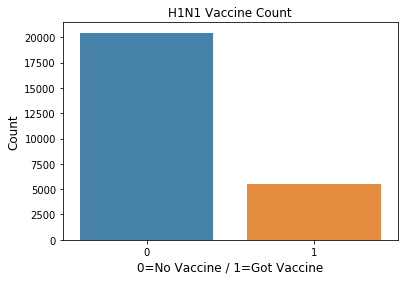

In [73]:
h1n1 = df_a['h1n1_vaccine'].value_counts()
#sns.set(style="darkgrid")
sns.barplot(h1n1.index, h1n1.values, alpha=0.9)
plt.title('H1N1 Vaccine Count')
plt.ylabel('Count', fontsize=12)
plt.xlabel('0=No Vaccine / 1=Got Vaccine', fontsize=12)
plt.show()

#### age_group
#### 55 - 64 Years

In [74]:
df_a['age_group'].value_counts(normalize=True).round(3)

65+ Years        0.250
55 - 64 Years    0.209
18 - 34 Years    0.198
45 - 54 Years    0.198
35 - 44 Years    0.146
Name: age_group, dtype: float64

In [75]:
#df_a.groupby('h1n1_vaccine')[['h1n1_vaccine','age_group','education']].count()
age_counts=df_a.groupby(['h1n1_vaccine','age_group'])[['h1n1_vaccine']].count()
age_counts.columns=['h1n1_by_age']
age_counts['Percentage'] = 100 * age_counts['h1n1_by_age']  / age_counts['h1n1_by_age'].sum()
age_counts.reset_index(inplace=True)
age_counts

h1n1_vaccine      age_group  h1n1_by_age  Percentage
0             0  18 - 34 Years         4168   16.040023
1             0  35 - 44 Years         3032   11.668270
2             0  45 - 54 Years         4142   15.939965
3             0  55 - 64 Years         4090   15.739850
4             0      65+ Years         5017   19.307293
5             1  18 - 34 Years          974    3.748316
6             1  35 - 44 Years          752    2.893977
7             1  45 - 54 Years          998    3.840677
8             1  55 - 64 Years         1331    5.122186
9             1      65+ Years         1481    5.699442

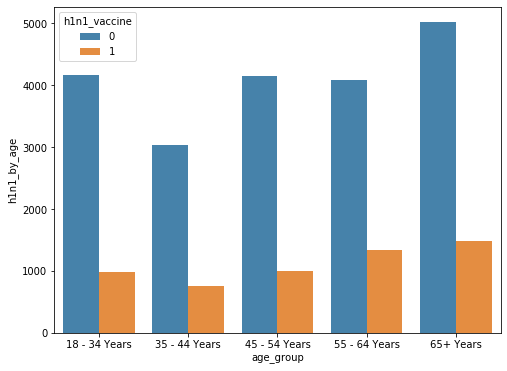

In [76]:
plt.figure(figsize=[8,6])
sns.barplot(alpha=0.9, data=age_counts, x='age_group',y='h1n1_by_age',hue='h1n1_vaccine');

In [77]:
fifty_over = age_counts.loc[age_counts['age_group'] == '55 - 64 Years']
fifty_over

h1n1_vaccine      age_group  h1n1_by_age  Percentage
3             0  55 - 64 Years         4090   15.739850
8             1  55 - 64 Years         1331    5.122186

In [78]:
#fifty_over.groupby(level=[3, 8]).apply(lambda g: g / g.sum())
fifty_over['h1n1_by_age'] / fifty_over['h1n1_by_age'].sum()

3    0.754473
8    0.245527
Name: h1n1_by_age, dtype: float64

In [79]:
#fifty_over['Percent_of_grp'] = 100 * fifty_over['h1n1_by_age']  / fifty_over['h1n1_by_age'].sum()
#(26707, 37)
fifty_over['h1n1_by_age'].sum()

5421

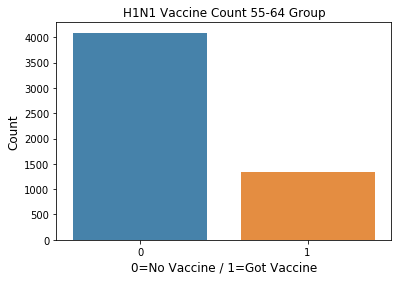

In [80]:

fiftyfive_sixtyfour = df_a[df_a['age_group'] == '55 - 64 Years']
fiftyfive_count = fiftyfive_sixtyfour['h1n1_vaccine'].value_counts()
sns.barplot(fiftyfive_count.index, fiftyfive_count.values, alpha=0.9)
plt.title('H1N1 Vaccine Count 55-64 Group')
plt.ylabel('Count', fontsize=12)
plt.xlabel('0=No Vaccine / 1=Got Vaccine', fontsize=12)
plt.show()

#### 65+ Years

In [81]:
sixty_five = age_counts.loc[age_counts['age_group'] == '65+ Years']
sixty_five

h1n1_vaccine  age_group  h1n1_by_age  Percentage
4             0  65+ Years         5017   19.307293
9             1  65+ Years         1481    5.699442

In [82]:
sixty_five['h1n1_by_age'] / sixty_five['h1n1_by_age'].sum()

4    0.772084
9    0.227916
Name: h1n1_by_age, dtype: float64

In [83]:
sixty_five['h1n1_by_age'].sum()

6498

#### Education

In [84]:
df_a['education'].value_counts(normalize=True).round(3)

College Graduate    0.381
Some College        0.265
12 Years            0.216
< 12 Years          0.087
Grad School +       0.051
Name: education, dtype: float64

In [85]:
educ_counts=df_a.groupby(['h1n1_vaccine','education'])[['h1n1_vaccine']].count()
educ_counts.columns=['h1n1_by_education']
#edu_counts['Percentage'] = 100 * edu_counts['h1n1_by_education']  / edu_counts['h1n1_by_education'].sum()
educ_counts['Percentage'] = 100 * educ_counts['h1n1_by_education']  / educ_counts['h1n1_by_education'].sum()
educ_counts.reset_index(inplace=True)
educ_counts

h1n1_vaccine         education  h1n1_by_education  Percentage
0             0          12 Years               4587   17.652492
1             0        < 12 Years               1870    7.196459
2             0  College Graduate               7461   28.712719
3             0     Grad School +               1079    4.152396
4             0      Some College               5452   20.981335
5             1          12 Years               1035    3.983067
6             1        < 12 Years                378    1.454685
7             1  College Graduate               2436    9.374639
8             1     Grad School +                253    0.973639
9             1      Some College               1434    5.518568

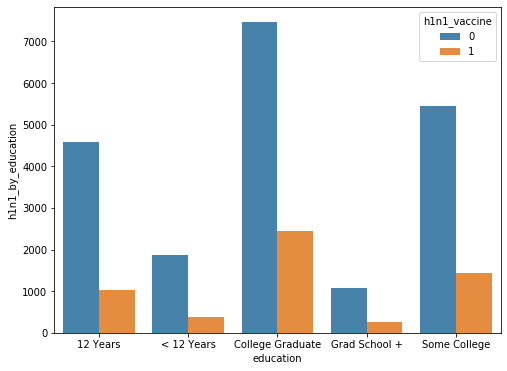

In [86]:
plt.figure(figsize=[8,6])
sns.barplot(alpha=0.9, data=educ_counts, x='education',y='h1n1_by_education',hue='h1n1_vaccine');

#### Gender

In [87]:
df_a.groupby('h1n1_vaccine')['sex'].count()

h1n1_vaccine
0    20449
1     5536
Name: sex, dtype: int64

In [88]:
df_a['sex'].value_counts()

Female    15449
Male      10536
Name: sex, dtype: int64

In [89]:
#group[h1n1]
df_a['sex'].value_counts(normalize=True)

Female    0.594535
Male      0.405465
Name: sex, dtype: float64

In [90]:
#P['Percentage'] = 100 * P['Title']  / P['Title'].sum()
gender_count=df_a.groupby(['h1n1_vaccine','sex'])[['sex']].count()
gender_count.columns=['h1n1_by_gender']
gender_count['Percentage'] = 100 * gender_count['h1n1_by_gender']  / gender_count['h1n1_by_gender'].sum()
gender_count.reset_index(inplace=True)
gender_count

h1n1_vaccine     sex  h1n1_by_gender  Percentage
0             0  Female           12044   46.349817
1             0    Male            8405   32.345584
2             1  Female            3405   13.103714
3             1    Male            2131    8.200885

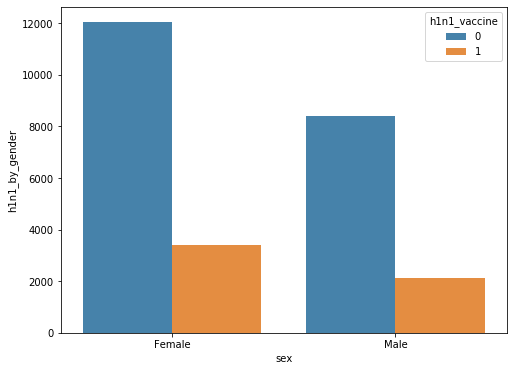

In [91]:
plt.figure(figsize=[8,6])
sns.barplot(alpha=0.9, data=gender_count, x='sex',y='h1n1_by_gender',hue='h1n1_vaccine')

In [92]:
gender_grp = gender_count['sex'] 
gender_grp

0    Female
1      Male
2    Female
3      Male
Name: sex, dtype: object

In [93]:
#fifty_over['h1n1_by_age'] / fifty_over['h1n1_by_age'].sum()
#fifty_over = age_counts.loc[age_counts['age_group'] == '55 - 64 Years']
gen_cat = gender_count.loc[(gender_count['sex'] == 'Male') | (gender_count['sex'] == 'Female')]
gen_cat.drop('Percentage',axis=1,inplace=True)

In [94]:
gen_cat

h1n1_vaccine     sex  h1n1_by_gender
0             0  Female           12044
1             0    Male            8405
2             1  Female            3405
3             1    Male            2131

##### Female

In [95]:
female = gen_cat.loc[gen_cat['sex']=='Female']
female

h1n1_vaccine     sex  h1n1_by_gender
0             0  Female           12044
2             1  Female            3405

In [96]:
print(female['h1n1_by_gender'] / female['h1n1_by_gender'].sum())
print('\n')
print('There are {} females in group'.format(female['h1n1_by_gender'].sum()))

0    0.779597
2    0.220403
Name: h1n1_by_gender, dtype: float64


There are 15449 females in group


##### Male

In [97]:
male = gen_cat.loc[gen_cat['sex']=='Male']
male

h1n1_vaccine   sex  h1n1_by_gender
1             0  Male            8405
3             1  Male            2131

In [98]:
print(male['h1n1_by_gender'] / male['h1n1_by_gender'].sum())
print('\n')
print('There are {} males in group'.format(male['h1n1_by_gender'].sum()))

1    0.797741
3    0.202259
Name: h1n1_by_gender, dtype: float64


There are 10536 males in group


#### H1N1 Vaccine v. Seasonal Vaccine

In [99]:
#df_a[['h1n1_vaccine','seasonal_vaccine']]
print(df_a['h1n1_vaccine'].value_counts(normalize=True))
print('\n')
print(df_a['seasonal_vaccine'].value_counts(normalize=True))

0    0.786954
1    0.213046
Name: h1n1_vaccine, dtype: float64


0    0.535078
1    0.464922
Name: seasonal_vaccine, dtype: float64


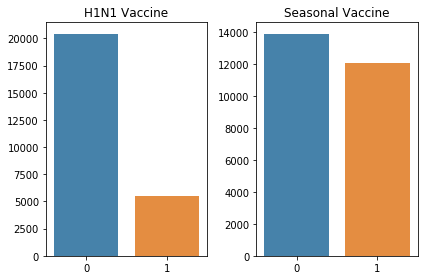

In [100]:
# h1n1 = df_a['h1n1_vaccine'].value_counts()
# #sns.set(style="darkgrid")
# sns.barplot(h1n1.index, h1n1.values, alpha=0.9)
fig, axs = plt.subplots(ncols=2)
#sns.regplot(x='value', y='wage', data=df_melt, ax=axs[0])
h1n1_count = df_a['h1n1_vaccine'].value_counts()
sns.barplot(h1n1_count.index,h1n1_count.values, alpha=0.9,ax=axs[0])
axs[0].set_title('H1N1 Vaccine')

seasonal_count = df_a['seasonal_vaccine'].value_counts()
sns.barplot(seasonal_count.index,seasonal_count.values, alpha=0.9,ax=axs[1])
axs[1].set_title('Seasonal Vaccine')
fig.tight_layout()

### One-Hot Encoding

In [101]:
obj_cols = df_a.select_dtypes('object')
obj_cols.head()

age_group         education   race     sex             income_poverty  \
0  55 - 64 Years        < 12 Years  White  Female              Below Poverty   
1  35 - 44 Years          12 Years  White    Male              Below Poverty   
2  18 - 34 Years  College Graduate  White    Male  <= $75,000, Above Poverty   
3      65+ Years          12 Years  White  Female              Below Poverty   
4  45 - 54 Years      Some College  White  Female  <= $75,000, Above Poverty   

  marital_status rent_or_own   employment_status hhs_geo_region  \
0    Not Married         Own  Not in Labor Force       oxchjgsf   
1    Not Married        Rent            Employed       bhuqouqj   
2    Not Married         Own            Employed       qufhixun   
3    Not Married        Rent  Not in Labor Force       lrircsnp   
4        Married         Own            Employed       qufhixun   

                 census_msa employment_industry employment_occupation  
0                   Non-MSA  Not in Labor Force    Not in Labor Force  
1  MSA, Not Principle  City            pxcmvdjn              xgwztkwe  
2  MSA, Not Principle  City            rucpziij              xtkaffoo  
3       MSA, Principle City  Not in Labor Force    Not in Labor Force  
4  MSA, Not Principle  City            wxleyezf              emcorrxb

In [102]:
obj_cols.columns

Index(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa', 'employment_industry', 'employment_occupation'],
      dtype='object')

In [103]:
obj_feats = ['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa', 'employment_industry', 'employment_occupation']
obj_dummies = pd.get_dummies(df_a[obj_feats],drop_first=True)#

In [104]:
obj_dummies.head()

age_group_35 - 44 Years  age_group_45 - 54 Years  age_group_55 - 64 Years  \
0                        0                        0                        1   
1                        1                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        1                        0   

   age_group_65+ Years  education_< 12 Years  education_College Graduate  \
0                    0                     1                           0   
1                    0                     0                           0   
2                    0                     0                           1   
3                    1                     0                           0   
4                    0                     0                           0   

   education_Grad School +  education_Some College  race_Hispanic  \
0                        0                       0              0   
1                        0                       0              0   
2                        0                       0              0   
3                        0                       0              0   
4                        0                       1              0   

   race_Other or Multiple  race_White  sex_Male  income_poverty_> $75,000  \
0                       0           1         0                         0   
1                       0           1         1                         0   
2                       0           1         1                         0   
3                       0           1         0                         0   
4                       0           1         0                         0   

   income_poverty_Below Poverty  income_poverty_Not in Labor Force  \
0                             1                                  0   
1                             1                                  0   
2                             0                                  0   
3                             1                                  0   
4                             0                                  0   

   marital_status_Neither  marital_status_Not Married  rent_or_own_Own  \
0                       0                           1                1   
1                       0                           1                0   
2                       0                           1                1   
3                       0                           1                0   
4                       0                           0                1   

   rent_or_own_Rent  employment_status_Not in Labor Force  \
0                 0                                     1   
1                 1                                     0   
2                 0                                     0   
3                 1                                     1   
4                 0                                     0   

   employment_status_Unemployed  hhs_geo_region_bhuqouqj  \
0                             0                        0   
1                             0                        1   
2                             0                        0   
3                             0                        0   
4                             0                        0   

   hhs_geo_region_dqpwygqj  hhs_geo_region_fpwskwrf  hhs_geo_region_kbazzjca  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   hhs_geo_region_lrircsnp  hhs_geo_region_lzgpxyit  hhs_geo_region_mlyzmhmf  \
0                        0      

In [105]:
result_df = pd.concat([df_a,obj_dummies], axis=1)

In [106]:
result_df.head()

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0           1.0             0.0                        0.0   
1           3.0             2.0                        0.0   
2           1.0             1.0                        0.0   
3           1.0             1.0                        0.0   
4           2.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0   
1                          0.0                      1.0   
2                          0.0                      0.0   
3                          1.0                      0.0   
4                          1.0                      0.0   

   behavioral_touch_face  doctor_recc_h1n1  doctor_recc_seasonal  \
0                    1.0               0.0                   0.0   
1                    1.0               0.0                   0.0   
2                    0.0               0.0                   0.0   
3                    0.0               0.0                   1.0   
4                    1.0               0.0                   0.0   

   chronic_med_condition  child_under_6_months  health_worker  \
0                    0.0                   0.0            0.0   
1                    0.0                   0.0            0.0   
2                    1.0                   0.0            0.0   
3                    1.0                   0.0            0.0   
4                    0.0                   0.0            0.0   

   health_insurance  opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
0               1.0                          3.0                1.0   
1               1.0                          5.0                4.0   
2               0.0                          3.0                1.0   
3               0.0                          3.0                3.0   
4               0.0                          3.0                3.0   

   opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  \
0                          2.0                          2.0   
1                          4.0                          4.0   
2                          1.0                          4.0   
3                          5.0                          5.0   
4                          2.0                          3.0   

   opinion_seas_risk  opinion_seas_sick_from_vacc      age_group  \
0                1.0                          2.0  55 - 64 Years   
1                2.0                          4.0  35 - 44 Years   
2                1.0                          2.0  18 - 34 Years   
3                4.0                          1.0      65+ Years   
4                1.0                          4.0  45 - 54 Years   

          education   race     sex             income_poverty marital_status  \
0        < 12 Years  White  Female              Below Poverty    Not Married   
1          12 Years  White    Male              Below Poverty    Not Married   
2  College Graduate  White    Male  <= $75,000, Above Poverty    Not Married   
3          12 Years  White  Female              Below Poverty    Not Married   
4      Some College  White  Female  <= $75,000, Above Poverty        Married   

  rent_or_own   employment_status hhs_geo_region                census_msa  \
0         Own  Not in Labor Force       oxchjgsf                   Non-MSA   
1        Rent            Employed       bhuqouqj  MSA, Not Principle  City   
2         Own            Employed       qufhixun  MSA, Not Principle  City   
3        Rent  Not in Labor Force 

In [107]:
result_df.isna().sum()

h1n1_concern                      0
h1n1_knowledge                    0
behavioral_antiviral_meds         0
behavioral_avoidance              0
behavioral_face_mask              0
                                 ..
employment_occupation_vlluhbov    0
employment_occupation_xgwztkwe    0
employment_occupation_xqwwgdyp    0
employment_occupation_xtkaffoo    0
employment_occupation_xzmlyyjv    0
Length: 113, dtype: int64

In [108]:
cols = ['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa', 'employment_industry', 'employment_occupation']
df_dummies = result_df.drop(cols, axis=1) 

In [109]:
df_dummies.head()

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0           1.0             0.0                        0.0   
1           3.0             2.0                        0.0   
2           1.0             1.0                        0.0   
3           1.0             1.0                        0.0   
4           2.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0   
1                          0.0                      1.0   
2                          0.0                      0.0   
3                          1.0                      0.0   
4                          1.0                      0.0   

   behavioral_touch_face  doctor_recc_h1n1  doctor_recc_seasonal  \
0                    1.0               0.0                   0.0   
1                    1.0               0.0                   0.0   
2                    0.0               0.0                   0.0   
3                    0.0               0.0                   1.0   
4                    1.0               0.0                   0.0   

   chronic_med_condition  child_under_6_months  health_worker  \
0                    0.0                   0.0            0.0   
1                    0.0                   0.0            0.0   
2                    1.0                   0.0            0.0   
3                    1.0                   0.0            0.0   
4                    0.0                   0.0            0.0   

   health_insurance  opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
0               1.0                          3.0                1.0   
1               1.0                          5.0                4.0   
2               0.0                          3.0                1.0   
3               0.0                          3.0                3.0   
4               0.0                          3.0                3.0   

   opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  \
0                          2.0                          2.0   
1                          4.0                          4.0   
2                          1.0                          4.0   
3                          5.0                          5.0   
4                          2.0                          3.0   

   opinion_seas_risk  opinion_seas_sick_from_vacc  household_adults  \
0                1.0                          2.0               0.0   
1                2.0                          4.0               0.0   
2                1.0                          2.0               2.0   
3                4.0                          1.0               0.0   
4                1.0                          4.0               1.0   

   household_children  h1n1_vaccine  seasonal_vaccine  \
0                 0.0             0                 0   
1                 0.0             0                 1   
2                 0.0             0                 0   
3                 0.0             0                 1   
4                 0.0             0                 0   

   age_group_35 - 44 Years  age_group_45 - 54 Years  age_group_55 - 64 Years  \
0                        0                        0                        1   
1                        1                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        1               

In [110]:
df_dummies.shape

(25985, 101)

In [111]:
#Normalize-normalize all features to a consistent scale of 0 to 1.
X = df_dummies.drop('h1n1_vaccine',axis=1).copy() #df_dummies_1.drop('h1n1_vaccine',axis=1).copy()
y = df_dummies['h1n1_vaccine']

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [114]:
pd.Series(y_train).value_counts(normalize=True)

0    0.787926
1    0.212074
Name: h1n1_vaccine, dtype: float64

### Logistic Regression

In [115]:
from sklearn.linear_model import LogisticRegression
#accuracy-how to judge model's performance

regr = LogisticRegression(fit_intercept=False,C=1e5, solver='liblinear')
regr.fit(X_train, y_train)

y_hat_test = regr.predict(X_test)

In [116]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

In [117]:
# #TN FP
# #FN TP
cm = confusion_matrix(y_test, y_hat_test)
cm

array([[6389,  343],
       [ 845,  999]])

#### Function to Evaluate Logisitic Regression Model
Function output consists of Classification Report, Confusion Matrix and ROC Curve.<br>

In [118]:
def evaluate_classification(y_true, y_pred,X_true, clf): 
    import sklearn.metrics as metrics
    """
    Evaluates logistic regression model
    args: 
        y_true: is y_test variable
        y_pred: is y_hat test which is for prediction
        X_true: is the X_test variable
        clf: is the model being input into function
    """
    print(confusion_matrix(y_test, y_hat_test))
    
    ## Classification Report / Scores 
    print(metrics.classification_report(y_true,y_pred))
 
    #creating figure for plots
    fig, ax = plt.subplots(figsize=(10,5),ncols=2)
    metrics.plot_confusion_matrix(clf,X_true,y_true,cmap="Blues",
                                  normalize='true',ax=ax[0])
    #create Confusion Matrix 
    ax[0].set(title='Confusion Matrix')
    #gets ROC score
    y_score = clf.predict_proba(X_true)[:,1]

    fpr,tpr,thresh = metrics.roc_curve(y_true,y_score)
    # print(f"ROC-area-under-the-curve= {}")
    roc_auc = round(metrics.auc(fpr,tpr),3)
    ax[1].plot(fpr,tpr,color='darkorange',label=f'ROC Curve (AUC={roc_auc})')
    ax[1].plot([0,1],[0,1],ls=':')
    ax[1].legend()
    ax[1].grid()
    ax[1].set(ylabel='True Positive Rate',xlabel='False Positive Rate',
          title='Receiver operating characteristic (ROC) Curve')
    plt.tight_layout()  

[[6389  343]
 [ 845  999]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      6732
           1       0.74      0.54      0.63      1844

    accuracy                           0.86      8576
   macro avg       0.81      0.75      0.77      8576
weighted avg       0.85      0.86      0.85      8576



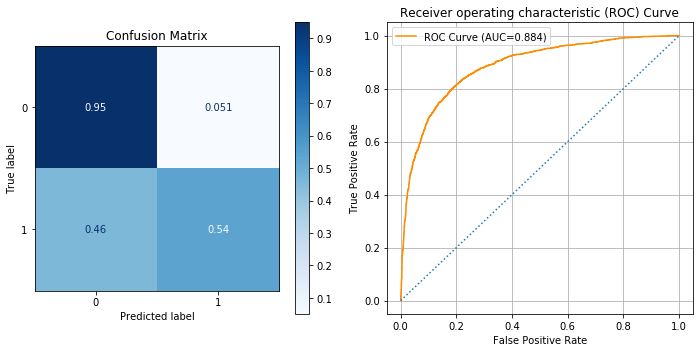

In [119]:
evaluate_classification(y_test,y_hat_test,X_test,regr)    

#### Logisitc Regression / Scaled Data

In [120]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
X_train_sca = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_sca = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns, index=X_test.index)

In [121]:
#scaled data between 0 and 1
X_train_sca.describe().round(2).loc[['min','max']]

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
min           0.0             0.0                        0.0   
max           1.0             1.0                        1.0   

     behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
min                   0.0                   0.0                    0.0   
max                   1.0                   1.0                    1.0   

     behavioral_large_gatherings  behavioral_outside_home  \
min                          0.0                      0.0   
max                          1.0                      1.0   

     behavioral_touch_face  doctor_recc_h1n1  doctor_recc_seasonal  \
min                    0.0               0.0                   0.0   
max                    1.0               1.0                   1.0   

     chronic_med_condition  child_under_6_months  health_worker  \
min                    0.0                   0.0            0.0   
max                    1.0                   1.0            1.0   

     health_insurance  opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
min               0.0                          0.0                0.0   
max               1.0                          1.0                1.0   

     opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  \
min                          0.0                          0.0   
max                          1.0                          1.0   

     opinion_seas_risk  opinion_seas_sick_from_vacc  household_adults  \
min                0.0                          0.0               0.0   
max                1.0                          1.0               1.0   

     household_children  seasonal_vaccine  age_group_35 - 44 Years  \
min                 0.0               0.0                      0.0   
max                 1.0               1.0                      1.0   

     age_group_45 - 54 Years  age_group_55 - 64 Years  age_group_65+ Years  \
min                      0.0                      0.0                  0.0   
max                      1.0                      1.0                  1.0   

     education_< 12 Years  education_College Graduate  \
min                   0.0                         0.0   
max                   1.0                         1.0   

     education_Grad School +  education_Some College  race_Hispanic  \
min                      0.0                     0.0            0.0   
max                      1.0                     1.0            1.0   

     race_Other or Multiple  race_White  sex_Male  income_poverty_> $75,000  \
min                     0.0         0.0       0.0                       0.0   
max                     1.0         1.0       1.0                       1.0   

     income_poverty_Below Poverty  income_poverty_Not in Labor Force  \
min                           0.0                                0.0   
max                           1.0                                1.0   

     marital_status_Neither  marital_status_Not Married  rent_or_own_Own  \
min                     0.0                         0.0              0.0   
max                     1.0                         1.0              1.0   

     rent_or_own_Rent  employment_status_Not in Labor Force  \
min               0.0                                   0.0   
max               1.0                                   1.0   

     employment_status_Unemployed  hhs_geo_region_bhuqouqj  \
min                           0.0                      0.0   
max                           1.0                      1.0   

     hhs_geo_region_dqpwygqj  hhs_geo_region_fpwskwrf  \
min                      0.0                      0.0   
max                      1.0                      1.0   

     hhs_geo_region_kbazzjca  hhs_geo_region_lrircsnp  \
min                      0.0                      0.0   
max                      1.0                      1.0   

     hhs_geo_region_lzgpxyit  hhs_geo_region_mlyzmhmf  \
min                      0.0                      0.0   
max  

In [122]:
#max isn't always 1 w/test
X_test_sca.describe().round(2).loc[['min','max']]

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
min           0.0             0.0                        0.0   
max           1.0             1.0                        1.0   

     behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
min                   0.0                   0.0                    0.0   
max                   1.0                   1.0                    1.0   

     behavioral_large_gatherings  behavioral_outside_home  \
min                          0.0                      0.0   
max                          1.0                      1.0   

     behavioral_touch_face  doctor_recc_h1n1  doctor_recc_seasonal  \
min                    0.0               0.0                   0.0   
max                    1.0               1.0                   1.0   

     chronic_med_condition  child_under_6_months  health_worker  \
min                    0.0                   0.0            0.0   
max                    1.0                   1.0            1.0   

     health_insurance  opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
min               0.0                          0.0                0.0   
max               1.0                          1.0                1.0   

     opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  \
min                          0.0                          0.0   
max                          1.0                          1.0   

     opinion_seas_risk  opinion_seas_sick_from_vacc  household_adults  \
min                0.0                          0.0               0.0   
max                1.0                          1.0               1.0   

     household_children  seasonal_vaccine  age_group_35 - 44 Years  \
min                 0.0               0.0                      0.0   
max                 1.0               1.0                      1.0   

     age_group_45 - 54 Years  age_group_55 - 64 Years  age_group_65+ Years  \
min                      0.0                      0.0                  0.0   
max                      1.0                      1.0                  1.0   

     education_< 12 Years  education_College Graduate  \
min                   0.0                         0.0   
max                   1.0                         1.0   

     education_Grad School +  education_Some College  race_Hispanic  \
min                      0.0                     0.0            0.0   
max                      1.0                     1.0            1.0   

     race_Other or Multiple  race_White  sex_Male  income_poverty_> $75,000  \
min                     0.0         0.0       0.0                       0.0   
max                     1.0         1.0       1.0                       1.0   

     income_poverty_Below Poverty  income_poverty_Not in Labor Force  \
min                           0.0                                0.0   
max                           1.0                                1.0   

     marital_status_Neither  marital_status_Not Married  rent_or_own_Own  \
min                     0.0                         0.0              0.0   
max                     1.0                         1.0              1.0   

     rent_or_own_Rent  employment_status_Not in Labor Force  \
min               0.0                                   0.0   
max               1.0                                   1.0   

     employment_status_Unemployed  hhs_geo_region_bhuqouqj  \
min                           0.0                      0.0   
max                           1.0                      1.0   

     hhs_geo_region_dqpwygqj  hhs_geo_region_fpwskwrf  \
min                      0.0                      0.0   
max                      1.0                      1.0   

     hhs_geo_region_kbazzjca  hhs_geo_region_lrircsnp  \
min                      0.0                      0.0   
max                      1.0                      1.0   

     hhs_geo_region_lzgpxyit  hhs_geo_region_mlyzmhmf  \
min                      0.0                      0.0   
max  

In [123]:
#fit_intercept=False sets the y-intercept to 0. 
#fit_intercept=True, the y-intercept will be determined by the line of best fit.

#an L2 regularization of C=1 is applied by default.
#by having large C, it's having small parameter added to equation
#C-1/lmbda. Large C 

#maximum number of iterations using max_iter parameter, where we typically increase when we have a very large amount of train data, 
#    the default value is max_iter =100.
#sma;; small data sets liblinear.  'sag' and 'saga' for larger ones.
regr = LogisticRegression(fit_intercept= True, C=1.0, max_iter=1000)# solver='liblinear',C=1e12
regr.fit(X_train_sca, y_train)

y_hat_test = regr.predict(X_test_sca)

[[6402  330]
 [ 814 1030]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      6732
           1       0.76      0.56      0.64      1844

    accuracy                           0.87      8576
   macro avg       0.82      0.75      0.78      8576
weighted avg       0.86      0.87      0.86      8576



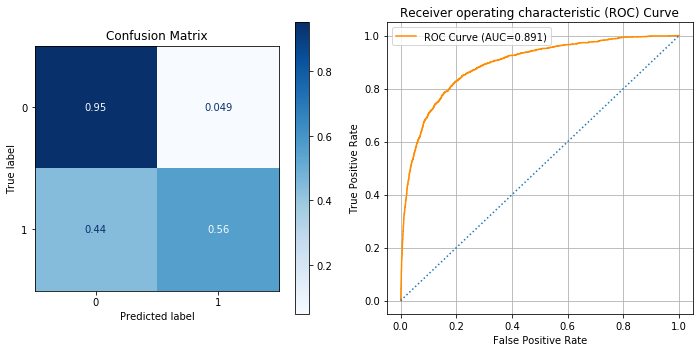

In [124]:
#precision- how accurate model ws at accuratly predicting true psotive values.
#    How many of class 1 were actually class 1.
#    precision-cost of acting is high and acting on a postive is costly
#    allocating resoucrs for prisoners who are at risk for recidivism.
#recall- what percentage of the classes were actaully captured by the model.
#    Recall-out of the number of true postives,how many of them did it find
#    how good is my model in finding class that I acutlly care about.
#    recall-when true postives/opporunties is small and don't want to miss one.
#    telling someone they don't have cancer when they do is fatal.
#ROC Curve-# of TP vs. # of FP
evaluate_classification(y_test,y_hat_test,X_test_sca,regr)    

#### Logistic Regression / Class Imbalance
This model addresses class imbalance issue with scaled data.<br>

In [125]:
regr = LogisticRegression(fit_intercept= True, C=1.0, max_iter=1000,class_weight='balanced')#C=1e5, solver='liblinear')
regr.fit(X_train_sca, y_train)

y_hat_test = regr.predict(X_test_sca)

In [126]:
#21% of observations were class 1
y_train.value_counts(normalize=True)

0    0.787926
1    0.212074
Name: h1n1_vaccine, dtype: float64

In [127]:
#solution
#solution: class weight parameter for scikit leanr models
pd.Series(y_test).value_counts()

0    6732
1    1844
Name: h1n1_vaccine, dtype: int64

### Best Logistic Regression Model
with scaled data and class imbalance issue addressed.<br>

[[5490 1242]
 [ 347 1497]]
              precision    recall  f1-score   support

           0       0.94      0.82      0.87      6732
           1       0.55      0.81      0.65      1844

    accuracy                           0.81      8576
   macro avg       0.74      0.81      0.76      8576
weighted avg       0.86      0.81      0.83      8576



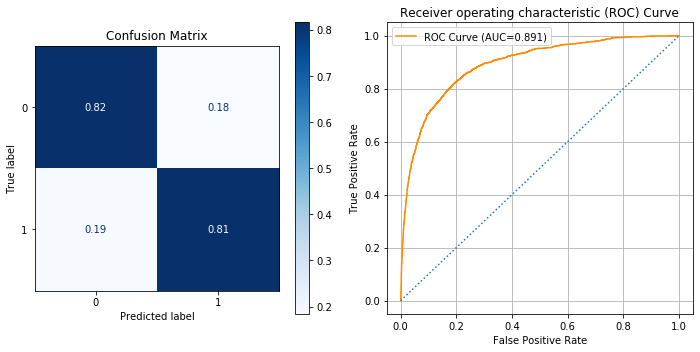

In [128]:
evaluate_classification(y_test,y_hat_test,X_test_sca,regr)  

#### Correlation between Features and Target

In [129]:
col_coef= pd.Series(regr.coef_[0], index=X_train.columns).sort_values(ascending=False)
col_coef

opinion_h1n1_vacc_effective       2.261389
doctor_recc_h1n1                  2.244236
seasonal_vaccine                  1.983218
opinion_h1n1_risk                 1.594569
health_insurance                  1.416293
                                    ...   
employment_industry_pxcmvdjn     -0.431597
employment_occupation_qxajmpny   -0.444996
employment_industry_atmlpfrs     -0.450249
employment_industry_dotnnunm     -0.523329
doctor_recc_seasonal             -1.073092
Length: 100, dtype: float64

In [130]:
#abolute value
def feature_correlation(logreg, X_train):
    """
    logreg: object of instance of model
    X_train: Xtrain
    """
    col_coef_1= pd.DataFrame(logreg.coef_[0], index=X_train.columns,columns=['coef_cols'])
    col_coef_1['abs_coef'] = np.abs(col_coef_1['coef_cols'])
    col_coef_1.sort_values(by='abs_coef',ascending=True,inplace=True)
    return col_coef_1

In [131]:
feature_correlation(regr, X_train)

coef_cols  abs_coef
employment_industry_fcxhlnwr  -0.001441  0.001441
behavioral_avoidance          -0.006639  0.006639
age_group_55 - 64 Years       -0.011699  0.011699
behavioral_wash_hands         -0.011830  0.011830
household_children            -0.013548  0.013548
...                                 ...       ...
health_insurance               1.416293  1.416293
opinion_h1n1_risk              1.594569  1.594569
seasonal_vaccine               1.983218  1.983218
doctor_recc_h1n1               2.244236  2.244236
opinion_h1n1_vacc_effective    2.261389  2.261389

[100 rows x 2 columns]

In [132]:
def plot_feat_corr(logreg,figsize=(10,10)):
    """
    function checks correlation between features and target.
    """
    col_coef_1= pd.DataFrame(logreg.coef_[0], index=X_train.columns,columns=['coef_cols'])
    col_coef_1['abs_coef'] = np.abs(col_coef_1['coef_cols'])
    col_coef_1.sort_values(by='abs_coef',ascending=True,inplace=True)
    ax = col_coef_1['coef_cols'].tail(10).plot(kind='barh');
    ax.set_title('Correlation of Features')
    return ax #col_coef_1, 

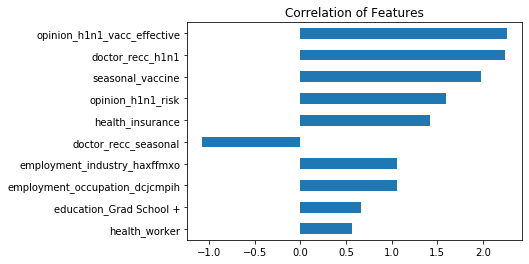

In [133]:
plot_feat_corr(regr);

#### Evaluate Model Function with Correlation Graph

In [134]:
#mine
import sklearn.metrics as metrics

def evaluate_classification_model(y_true, y_pred,X_true,clf):
    """
    Evaluates logistic regression model
    args: 
        y_true: is y_test variable
        y_pred: is y_hat test which is for prediction
        X_true: is the X_test variable
        clf: is the model being input into function
    """
    ## Classification Report / Scores 
    print(metrics.classification_report(y_true,y_pred))

    #create plots
    fig, ax = plt.subplots(figsize=(10,4),ncols=2)
    metrics.plot_confusion_matrix(clf,X_true,y_true,cmap="Blues",
                                  normalize='true',ax=ax[0])
    #plot for confusion matrix 
    ax[0].set(title='Confusion Matrix')
    y_score = clf.predict_proba(X_true)[:,1]

    fpr,tpr,thresh = metrics.roc_curve(y_true,y_score)
    # ROC plot(f"ROC-area-under-the-curve= {}")
    roc_auc = round(metrics.auc(fpr,tpr),3)
    ax[1].plot(fpr,tpr,color='darkorange',label=f'ROC Curve (AUC={roc_auc})')
    ax[1].plot([0,1],[0,1],ls=':')
    ax[1].legend()
    ax[1].grid()
    ax[1].set(ylabel='True Positive Rate',xlabel='False Positive Rate',
          title='Receiver operating characteristic (ROC) Curve')
    plt.tight_layout()
    plt.show()

    #correlation plot
    df_corr = plot_feat_corr(clf)
    return df_corr


              precision    recall  f1-score   support

           0       0.94      0.82      0.87      6732
           1       0.55      0.81      0.65      1844

    accuracy                           0.81      8576
   macro avg       0.74      0.81      0.76      8576
weighted avg       0.86      0.81      0.83      8576



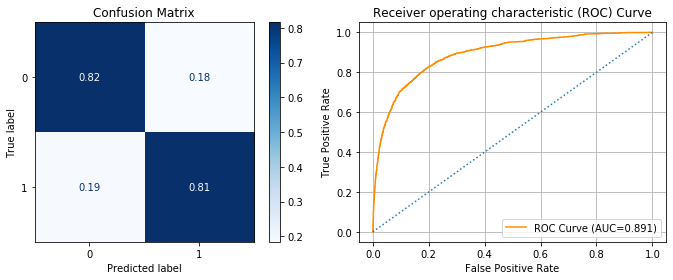

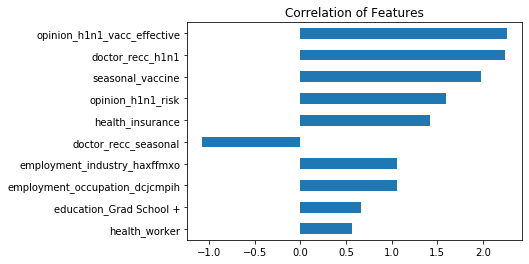

In [135]:
#mine
evaluate_classification_model(y_test,y_hat_test,X_test_sca,regr)  

Logsitic Regression Model with Features that are higly postively or negatively correlated with target.<br>
Model has default parameters.<br>

In [136]:
cols = ['opinion_h1n1_vacc_effective', 'doctor_recc_h1n1', 'seasonal_vaccine', 'opinion_h1n1_risk','health_insurance', 'doctor_recc_seasonal',                   
'employment_industry_haxffmxo', 'employment_occupation_dcjcmpih','education_Grad School +','health_worker'] 

df_cor = df_dummies[cols]
X_1 = df_cor
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y, test_size=0.33, random_state=42)

In [137]:
df_cor.head()

opinion_h1n1_vacc_effective  doctor_recc_h1n1  seasonal_vaccine  \
0                          3.0               0.0                 0   
1                          5.0               0.0                 1   
2                          3.0               0.0                 0   
3                          3.0               0.0                 1   
4                          3.0               0.0                 0   

   opinion_h1n1_risk  health_insurance  doctor_recc_seasonal  \
0                1.0               1.0                   0.0   
1                4.0               1.0                   0.0   
2                1.0               0.0                   0.0   
3                3.0               0.0                   1.0   
4                3.0               0.0                   0.0   

   employment_industry_haxffmxo  employment_occupation_dcjcmpih  \
0                             0                               0   
1                             0                               0   
2                             0                               0   
3                             0                               0   
4                             0                               0   

   education_Grad School +  health_worker  
0                        0            0.0  
1                        0            0.0  
2                        0            0.0  
3                        0            0.0  
4                        0            0.0

In [138]:
regr_1 = LogisticRegression()#C=1e5, solver='liblinear')
regr_1.fit(X_train_1, y_train_1)

y_hat_test_1 = regr_1.predict(X_test_1)


[[5490 1242]
 [ 347 1497]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      6732
           1       0.76      0.54      0.63      1844

    accuracy                           0.86      8576
   macro avg       0.82      0.75      0.78      8576
weighted avg       0.86      0.86      0.86      8576



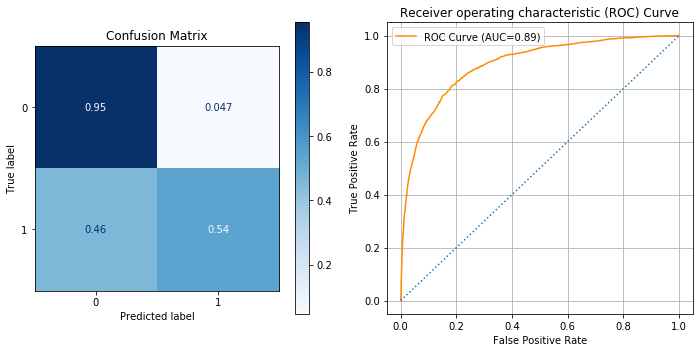

In [139]:
evaluate_classification(y_test_1,y_hat_test_1,X_test_1,regr_1)  

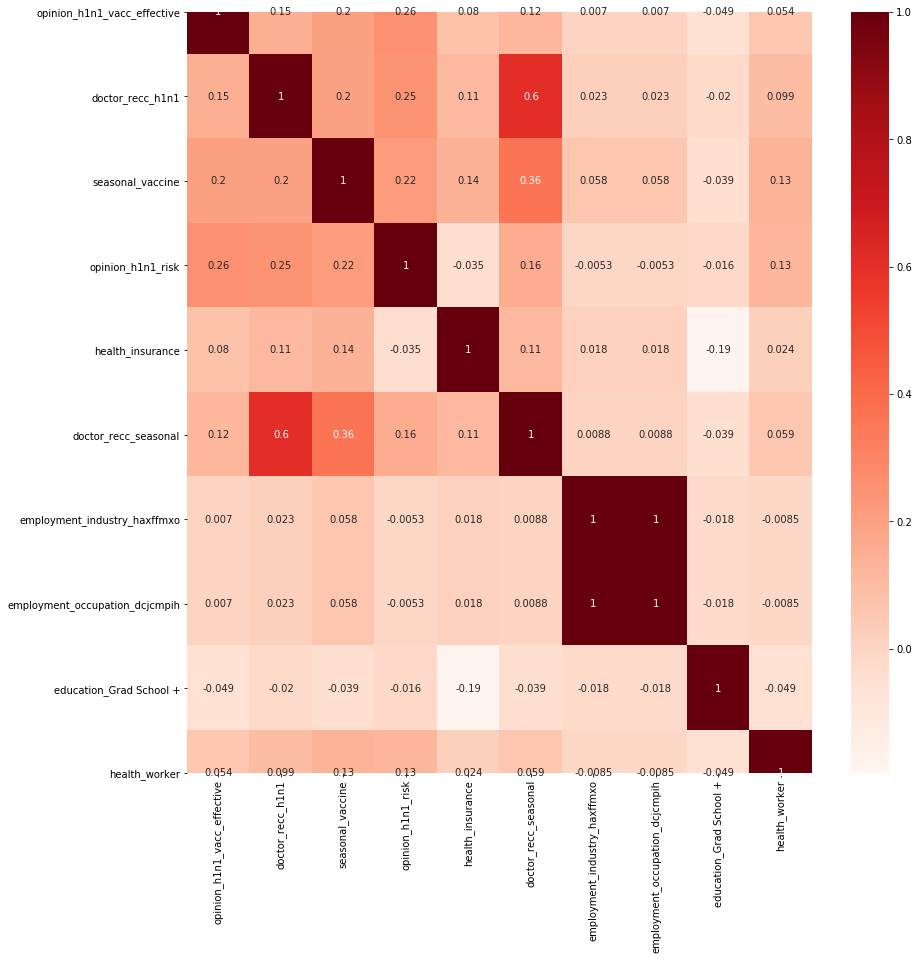

In [140]:
plt.figure(figsize=(14,14))
cor = df_cor.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### Logistic Regression with SMOTE
SMOTE used to address imbalance issue.

In [141]:
#oversampling minority class
y_train.value_counts()

0    13717
1     3692
Name: h1n1_vaccine, dtype: int64

In [142]:
#before-adjusting weight that our model uses, to make up for class imbalance.
#resampling our minority class to make it have as many observations as our majoirty class.
#going to tak class you ahve less of and generate new observations for and did it. New data won't skew data 
#only smote training data
#modle will learin in a more blanced way
#just wantto make sureit learns.
from imblearn.over_sampling import SMOTE
smote = SMOTE()

X_train_smote, y_train_smote = smote.fit_sample(X_train_sca,y_train)
pd.Series(y_train_smote).value_counts()

/Users/davidtorres/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/Users/davidtorres/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/davidtorres/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is depreca

1    13717
0    13717
dtype: int64

In [143]:
regr = LogisticRegression(fit_intercept= True, C=1.0, max_iter=1000)
regr.fit(X_train_smote, y_train_smote)

y_hat_test = regr.predict(X_test_sca)


[[5557 1175]
 [ 376 1468]]
              precision    recall  f1-score   support

           0       0.94      0.83      0.88      6732
           1       0.56      0.80      0.65      1844

    accuracy                           0.82      8576
   macro avg       0.75      0.81      0.77      8576
weighted avg       0.85      0.82      0.83      8576



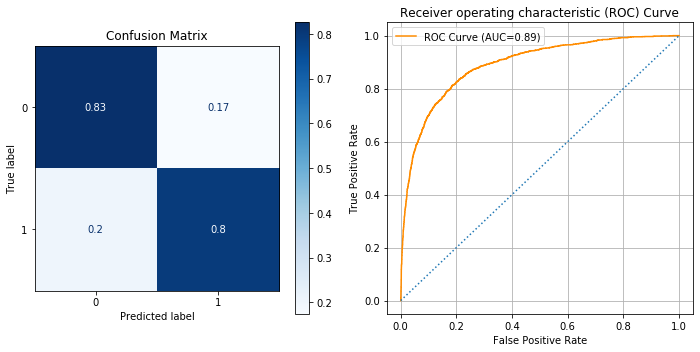

In [144]:
evaluate_classification(y_test,y_hat_test,X_test_sca,regr) 

### Logistic Regression with GridSearchCV

In [145]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [146]:
from sklearn.model_selection import GridSearchCV

regr = LogisticRegression(class_weight='balanced',C=1e5, solver='liblinear')
regr.fit(X_train_sca, y_train)

test_preds = regr.predict(X_test_sca)
grid = GridSearchCV(regr,hyperparameters, scoring='f1',verbose=1,return_train_score=True)
#grid is model
grid.fit(X_train_sca,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.6min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=100000.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=T

In [147]:
grid.best_params_

{'C': 1.0, 'penalty': 'l1'}

In [148]:
regr = grid.best_estimator_

[[5486 1246]
 [ 348 1496]]
              precision    recall  f1-score   support

           0       0.94      0.81      0.87      6732
           1       0.55      0.81      0.65      1844

    accuracy                           0.81      8576
   macro avg       0.74      0.81      0.76      8576
weighted avg       0.86      0.81      0.83      8576



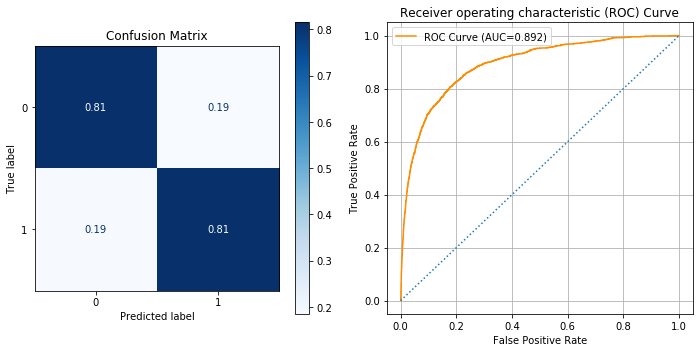

In [149]:
y_hat_test = regr.predict(X_test_sca)
evaluate_classification(y_test, y_hat_test,X_test_sca, regr)

### DecisionTreeClassifier

In [150]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
from sklearn.tree import export_graphviz
from IPython.display import Image  
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

In [151]:
def plot_importance(tree, top_n=10,figsize=(10,10)):
    df_importance = pd.Series(tree.feature_importances_,index=X_train.columns)
    df_importance.sort_values(ascending=True).tail(top_n).plot(
        kind='barh',figsize=figsize)
    return df_importance
#plot_importance(tree);

In [152]:
import sklearn.metrics as metrics

def evaluate_model(y_true, y_pred,X_true,clf):
    
    ## Classification Report / Scores 
    print(metrics.classification_report(y_true,y_pred))

    fig, ax = plt.subplots(figsize=(10,4),ncols=2)
    metrics.plot_confusion_matrix(clf,X_true,y_true,cmap="Greens",
                                  normalize='true',ax=ax[0])
    ax[0].set(title='Confusion Matrix')
    y_score = clf.predict_proba(X_true)[:,1]

    fpr,tpr,thresh = metrics.roc_curve(y_true,y_score)
    # print(f"ROC-area-under-the-curve= {}")
    roc_auc = round(metrics.auc(fpr,tpr),3)
    ax[1].plot(fpr,tpr,color='darkorange',label=f'ROC Curve (AUC={roc_auc})')
    ax[1].plot([0,1],[0,1],ls=':')
    ax[1].legend()
    ax[1].grid()
    ax[1].set(ylabel='True Positive Rate',xlabel='False Positive Rate',
          title='Receiver operating characteristic (ROC) Curve')
    plt.tight_layout()
    plt.show()
    try: 
        df_important = plot_importance(clf)
    except:
        df_important = None
    
#     return df_important
#evaluate_model(y_test,y_hat_test,X_test,tree)

In [153]:
## visualize the decision tree
#if you have one-hot enocded column, less than .05 is 0 and greater 1
def visualize_tree(tree,feature_names=None,class_names=['0','1'],format_='png',
                   kws={},save_filename=None):
    """Visualizes a sklearn tree using sklearn.tree.export_graphviz"""
    from sklearn.tree import export_graphviz
    from IPython.display import SVG
    import graphviz #import Source
    from IPython.display import display
    
    if feature_names is None:
        feature_names=X_train.columns

    tree_viz_kws =  dict(out_file=None,rounded=True, rotate=False, filled = True)
    tree_viz_kws.update(kws)

    # tree.export_graphviz(dt) #if you wish to save the output to a dot file instead
    tree_data=export_graphviz(tree,feature_names=feature_names, 
                                   class_names=class_names,**tree_viz_kws)
    graph = graphviz.Source(tree_data,format=format_)#'png')
    display(graph)
    if save_filename is not None:
        graph.render(save_filename)

#     display(SVG(graph.pipe(format=format_)))#'svg')))

### DecisionTree max_depth=5
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.<br>

In [154]:
tree = DecisionTreeClassifier(class_weight='balanced',max_depth=5)

tree.fit(X_train, y_train)
y_hat_test = tree.predict(X_test)

In [155]:
#The most imprtant features
df_import = pd.Series(tree.feature_importances_, index = X_train.columns,name='Importance')
df_import.sort_values()

h1n1_concern                    0.000000
employment_industry_saaquncn    0.000000
employment_industry_rucpziij    0.000000
employment_industry_qnlwzans    0.000000
employment_industry_pxcmvdjn    0.000000
                                  ...   
opinion_h1n1_risk               0.063274
doctor_recc_seasonal            0.077223
health_insurance                0.098338
doctor_recc_h1n1                0.209989
seasonal_vaccine                0.498232
Name: Importance, Length: 100, dtype: float64

              precision    recall  f1-score   support

           0       0.94      0.81      0.87      6732
           1       0.54      0.80      0.64      1844

    accuracy                           0.81      8576
   macro avg       0.74      0.81      0.76      8576
weighted avg       0.85      0.81      0.82      8576



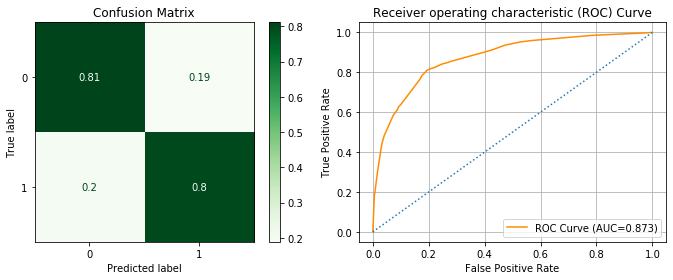

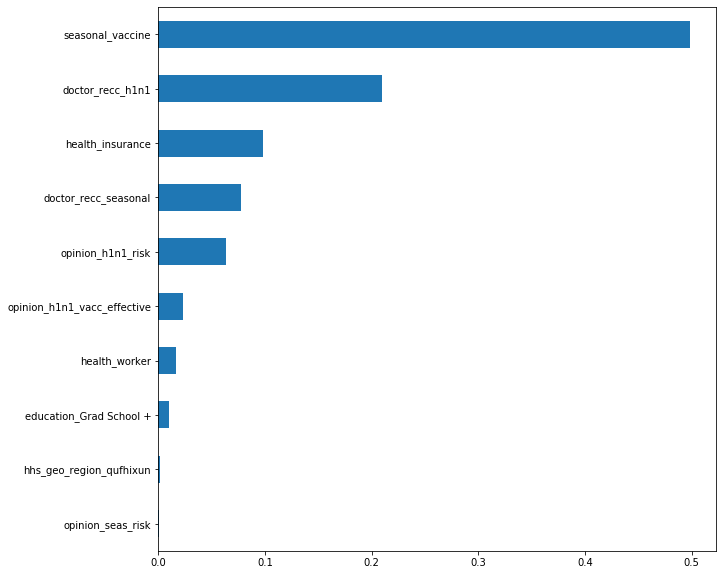

In [156]:
# opinion_h1n1_vacc_effective             2.261389
# doctor_recc_h1n1                        2.244236
# seasonal_vaccine                        1.983218
# opinion_h1n1_risk                       1.594569
# he
evaluate_model(y_test,y_hat_test,X_test,tree)

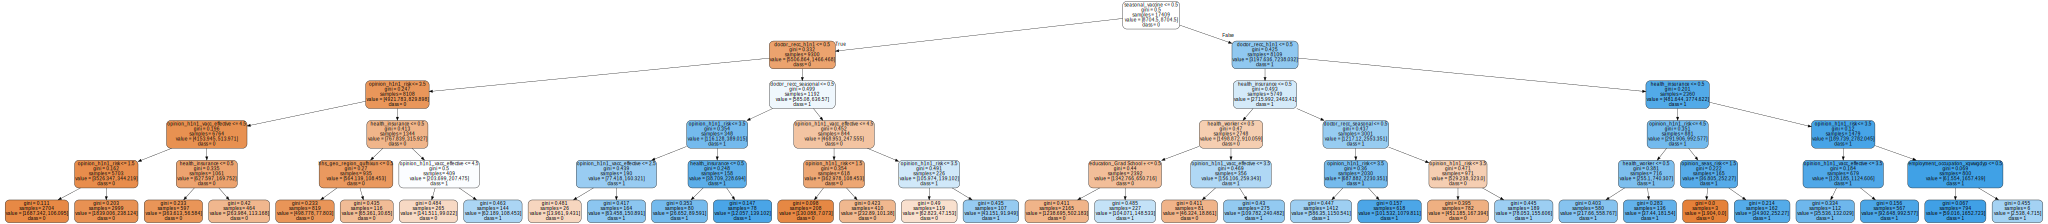

In [157]:
visualize_tree(tree)

#### DecisionTree with max_depth default

In [158]:
tree_clf = DecisionTreeClassifier(class_weight='balanced',criterion='gini')
tree_clf.fit(X_train_sca,y_train)
y_hat_test = tree_clf.predict(X_test_sca)

              precision    recall  f1-score   support

           0       0.87      0.88      0.87      6732
           1       0.54      0.53      0.54      1844

    accuracy                           0.80      8576
   macro avg       0.71      0.71      0.71      8576
weighted avg       0.80      0.80      0.80      8576



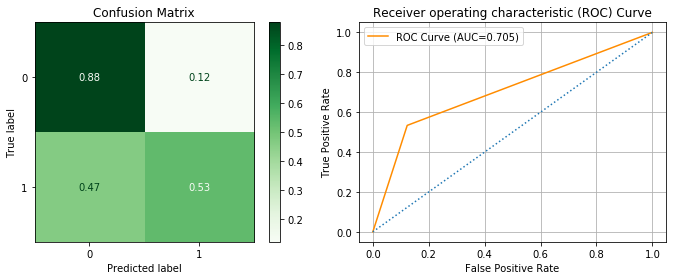

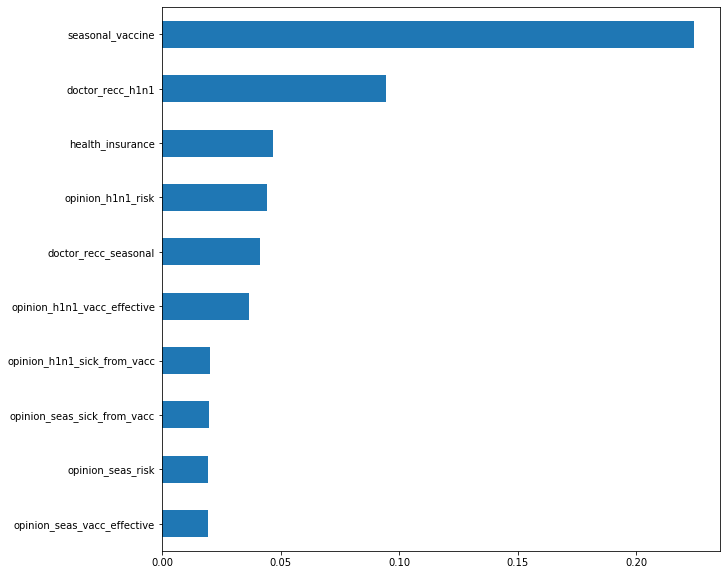

In [159]:
evaluate_model(y_test,y_hat_test,X_test_sca,tree_clf)

In [160]:
visualize_tree(tree_clf)

### GridSearch with DecisionTree

In [161]:
# max-depth
# min_samples_leaf: The smallest number of samples that can be in a leaf (node)
# min_samples_split: The smallest number of samples in a leaf (node) before splitting it
# max_features: Most features to consider when splitting

#GridSearch and Randomized Search
#XGboost is a model

In [162]:
params = dict(max_features = list(range(1, X_train.shape[1])),
min_samples_leaf = np.linspace(0.1, 0.5, 5, endpoint=True),
min_samples_split = np.linspace(0.1, 1.0, 10, endpoint=True),
max_depth = np.linspace(1, 32, 32, endpoint=True))
print(params)

{'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], 'min_samples_leaf': array([0.1, 0.2, 0.3, 0.4, 0.5]), 'min_samples_split': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), 'max_depth': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32.])}


Started at 2020-04-29 13:55:17.541076-04:00<br>
Total Time = 0:00:13.757412<br>
0.8206689143873503<br>
{'min_samples_split': 0.1, 'min_samples_leaf': 0.1, 'max_features': 82, 'max_depth': 26.0}<br>

In [163]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import datetime as dt 
import tzlocal

start = dt.datetime.now(tz=tzlocal.get_localzone())
print(f"Started at {start}")
clf = DecisionTreeClassifier()
#gridsearch = GridSearchCV(clf,params,scoring='roc_auc',cv=3)
gridsearch = RandomizedSearchCV(clf,params,scoring='roc_auc',cv=3, n_iter=100,n_jobs=3)
gridsearch.fit(X_train,y_train)

end = dt.datetime.now(tz=tzlocal.get_localzone())

print(f'Total Time = {end-start}')

print(gridsearch.best_score_)
print(gridsearch.best_params_)

Started at 2020-05-12 14:30:09.765020-04:00
Total Time = 0:00:18.136735
0.8198275484229912
{'min_samples_split': 0.2, 'min_samples_leaf': 0.1, 'max_features': 90, 'max_depth': 19.0}


In [164]:
clf_best = gridsearch.best_estimator_
#metrics.plot_confusion_matrix(clf_best,X_test,y_test,cmap='Blues',normalize='true')

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      6732
           1       0.55      0.52      0.53      1844

    accuracy                           0.80      8576
   macro avg       0.71      0.70      0.70      8576
weighted avg       0.80      0.80      0.80      8576



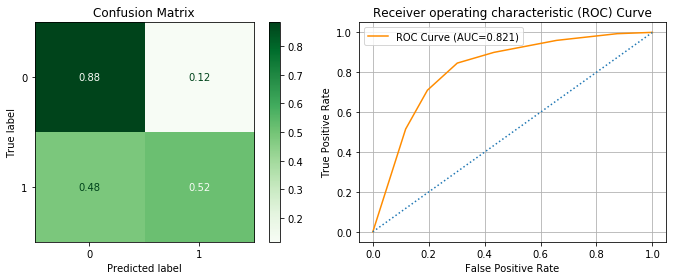

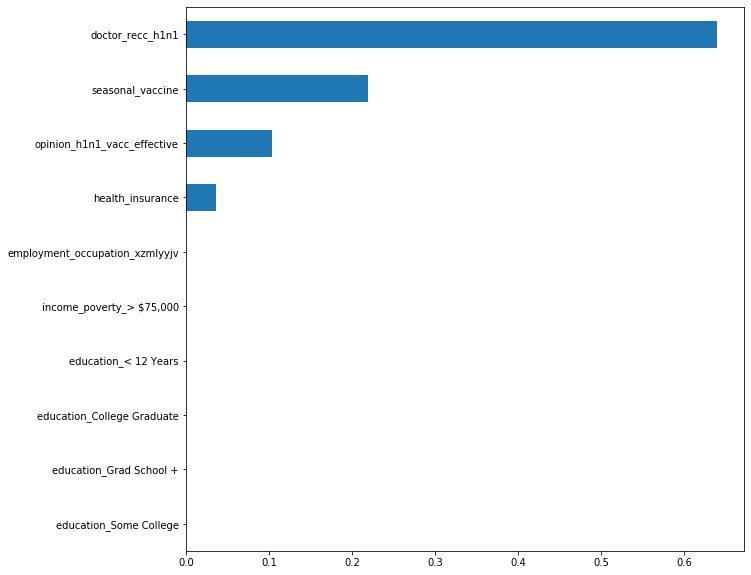

In [165]:
y_hat_test = clf_best.predict(X_test)
evaluate_model(y_test,y_hat_test,X_test,clf_best)

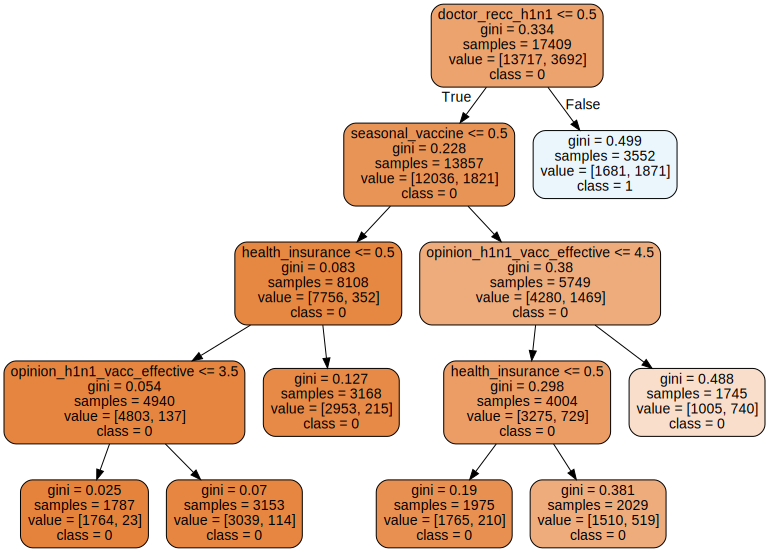

In [166]:
visualize_tree(clf_best, save_filename='vanilla tree')

## Conclusion and Recommendations¶
In light of pandemic and upcoming flu season Summit Medical wants to increase H1N1 Flu vaccination rates for as many groups as possible.   Overall rates are low.
I ran models of the data in order to provide you with facts, insights and recommendations to improve H1N1 rates.<br>
Reported numbers for elderly are very low.<br>
The following research and/or outreach may assist in increasing the H1N1 vaccination rates:<br> 
Research people’s attitudes on effectiveness and risks of vaccine. I read in 2018 that the flu vaccine/H1N1 vaccine for that year wasn’t very good in providing immunity. What impact has this had on subsequent vaccinations rates?
Whether patient has health insurance is important. Increase efforts for low-cost or free vaccinations.<br>
If doctors recommended seasonal vaccine, it negatively impacted people’s decisions’ to get H1N1. Research if patients only want 1 vaccine or the other?
Outreach to Doctors/Medical professionals. Are they recommending both H1N1 vaccine and seasonal flu vaccines to patients or just the seasonal? This is impacting patients’ decision to get H1N1.
Research if population understands difference between H1N1 vaccine and seasonal flu vaccine. Does the population think that they’re the same vaccine. Is there a different shot for each vaccine?